## Imports

In [38]:
import os 
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt 
from keras.callbacks import TensorBoard
from time import strftime
%matplotlib inline

In [3]:
from numpy.random import seed
seed(888)
from tensorflow import random
random.set_seed(404)

## Constants

In [27]:
LABEL_NAMES = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT =32
IMAGE_PIXELS= IMAGE_HEIGHT*IMAGE_WIDTH
COLOR_CHANNELS =3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS

LOG_DIR ='tensorboard_cifar_logs/'

## Get the Data

In [4]:
(X_train,y_train),(X_test,y_test)=(cifar10.load_data())

## Explore the data

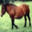

In [5]:
pic = array_to_img(X_train[7])
display(pic)

In [6]:
y_train[7][0]

7

In [7]:
LABEL_NAMES[y_train[7][0]]

'Horse'

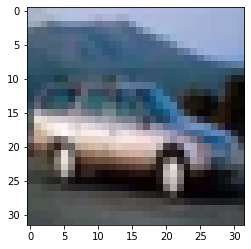

In [8]:
plt.imshow(X_train[4])
plt.show()

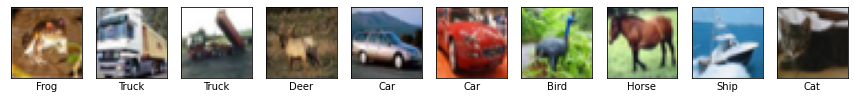

In [9]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train[i][0]])
    plt.imshow(X_train[i])

In [10]:
X_train.shape

(50000, 32, 32, 3)

## Preprocess Data

In [11]:
 # Every element is an unsigned integer and converted into float
X_train,X_test = X_train/255.0,X_test/255.0

In [12]:
X_train =X_train.reshape(X_train.shape[0],TOTAL_INPUTS)

In [13]:
X_test =X_test.reshape(X_test.shape[0],TOTAL_INPUTS)

In [14]:
# We have to further divide training dataset into validation data test
X_val = X_train[:10000]
y_val= y_train[:10000]

In [15]:
x_train=X_train[10000:]
y_train=y_train[10000:]

In [16]:
x_train_s=x_train[:1000]
y_train_s=y_train[:1000]

# Define the neural network using keras

In [24]:
# Defining the model
model_1=Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS,activation='relu',name='m1_hidden1'),
    Dense(units=64 , activation='relu',name='m1_hidden2'),
    Dense(16,activation='relu',name='m1_hidden3'),
    Dense(10,activation='softmax',name='m1_output')
])
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [39]:
model_2 = Sequential()
model_2.add(Dropout(0.2,seed=42,input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128,activation='relu',name='m2_hidden1'))
model_2.add(Dense(64,activation='relu',name='m2_hidden2'))
model_2.add(Dense(16,activation='relu',name='m2_hidden3'))
model_2.add(Dense(10,activation='softmax',name='m2_output'))
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [25]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


# Tensorboard (Visualizing learning)

In [31]:
def get_tensorboard(model_name):
    folder_name =f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR,folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Succesfully created directory')
    return TensorBoard(log_dir=dir_paths)
    

# Fit the model

In [32]:
sample_per_batch = 1000

In [34]:
%%time
nr_epochs=150
model_1.fit(x_train_s,y_train_s,batch_size=sample_per_batch,epochs=nr_epochs,
           callbacks=[get_tensorboard('Model_1')],verbose=0,validation_data=(X_val,y_val))

Succesfully created directory
Wall time: 16.2 s


In [42]:
%%time
nr_epochs=150
model_1.fit(x_train,y_train,batch_size=sample_per_batch,epochs=nr_epochs,
           callbacks=[get_tensorboard('Model_1XL')],verbose=0,validation_data=(X_val,y_val))

Succesfully created directory
Wall time: 3min 13s


In [40]:
%%time
nr_epochs=150
model_2.fit(x_train_s,y_train_s,batch_size=sample_per_batch,epochs=nr_epochs,
           callbacks=[get_tensorboard('Model_2')],verbose=0,validation_data=(X_val,y_val))

Succesfully created directory
Wall time: 40.5 s


# Prediction